In [1]:
import json
import pandas as pd

In [2]:
FILEPATH='meta_Clothing_Shoes_and_Jewelry.json'

In [3]:
def read_meata(FILEPATH):
    with open(FILEPATH, 'r') as f:
        for line in f:
            yield eval(line)
        
data = list(read_meata(FILEPATH))

In [4]:
df = pd.DataFrame(data)

In [5]:
del data

In [6]:
df.head()

,asin,brand,categories,description,imUrl,price,related,salesRank,title
0,0000037214,Big Dreams,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...",NaN,http://ecx.images-amazon.com/images/I/31mCncNu...,6.99,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",{'Clothing': 1233557},Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...
1,0000031887,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,http://ecx.images-amazon.com/images/I/314qZjYe...,6.79,"{'also_bought': ['0000031852', '0000031895', '...",{'Sports &amp; Outdoors': 8547},Ballet Dress-Up Fairy Tutu
2,0123456479,NaN,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",Elegance par excellence. Hand-crafted of the f...,http://ecx.images-amazon.com/images/I/413tGhqo...,64.98,"{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",{'Kitchen & Dining': 16987},SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...
3,0456844570,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN,http://ecx.images-amazon.com/images/I/31QZTHxv...,NaN,"{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...",{'Clothing': 1180499},RiZ Women's Beautify Crafted &frac12; Rimmed F...
4,0456808574,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN,http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",{'Clothing': 1038084},Lantin White Visor Wrap Around Ski Style Aviat...


In [7]:
wdf = df[['title', 'description', 'categories', 'imUrl']]

In [8]:
wdf.head()

,title,description,categories,imUrl
0,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,NaN,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...",http://ecx.images-amazon.com/images/I/31mCncNu...
1,Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",http://ecx.images-amazon.com/images/I/314qZjYe...
2,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,Elegance par excellence. Hand-crafted of the f...,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",http://ecx.images-amazon.com/images/I/413tGhqo...
3,RiZ Women's Beautify Crafted &frac12; Rimmed F...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",http://ecx.images-amazon.com/images/I/31QZTHxv...
4,Lantin White Visor Wrap Around Ski Style Aviat...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",http://ecx.images-amazon.com/images/I/31UsrgT5...


In [16]:
wdf = wdf.dropna()

In [29]:
wdf['cat'] = wdf.categories.apply(lambda x: x[0])

In [53]:
wdf.head()

,title,description,categories,imUrl,cat
1,Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",http://ecx.images-amazon.com/images/I/314qZjYe...,"[Clothing, Shoes & Jewelry, Girls, Clothing, A..."
2,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,Elegance par excellence. Hand-crafted of the f...,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",http://ecx.images-amazon.com/images/I/413tGhqo...,"[Clothing, Shoes & Jewelry, Novelty, Costumes ..."
10,Red Crocodile Embossed Leather Travel Wallet,ISBN: 0641674791\nISBN-13: 9780641674792\nManu...,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",http://ecx.images-amazon.com/images/I/31wW2pPm...,"[Clothing, Shoes & Jewelry, Women, Accessories..."
11,Vera Bradley Tote Blue Rhapsody,"Vera Bradley Tote\n1 veryberry paisley,3 symph...","[[Clothing, Shoes & Jewelry, Luggage & Travel ...",http://ecx.images-amazon.com/images/I/51WqmUxY...,"[Clothing, Shoes & Jewelry, Luggage & Travel G..."
13,Bear Ear Hoodie Jacket &amp; Poms on drawstrin...,Adorable fleece teddy bear ear sweater for adu...,"[[Clothing, Shoes & Jewelry, Women, Petite, Fa...",http://ecx.images-amazon.com/images/I/51JCLkQk...,"[Clothing, Shoes & Jewelry, Women, Petite, Fas..."


In [33]:
s = wdf.apply(lambda x: pd.Series(x['cat']),axis=1).stack().reset_index(level=1, drop=True)

In [35]:
s.name = 'unique_cat'

In [36]:
udf = wdf.drop('cat', axis=1).join(s)

In [40]:
udf.unique_cat.unique().shape

(674,)

In [43]:
import matplotlib.pyplot as plt

In [54]:
udf.head(20)

,title,description,categories,imUrl,unique_cat
1,Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",http://ecx.images-amazon.com/images/I/314qZjYe...,"Clothing, Shoes & Jewelry"
1,Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",http://ecx.images-amazon.com/images/I/314qZjYe...,Girls
1,Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",http://ecx.images-amazon.com/images/I/314qZjYe...,Clothing
1,Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",http://ecx.images-amazon.com/images/I/314qZjYe...,Active
1,Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",http://ecx.images-amazon.com/images/I/314qZjYe...,Active Skirts
2,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,Elegance par excellence. Hand-crafted of the f...,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",http://ecx.images-amazon.com/images/I/413tGhqo...,"Clothing, Shoes & Jewelry"
2,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,Elegance par excellence. Hand-crafted of the f...,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",http://ecx.images-amazon.com/images/I/413tGhqo...,"Novelty, Costumes & More"
2,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,Elegance par excellence. Hand-crafted of the f...,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",http://ecx.images-amazon.com/images/I/413tGhqo...,Jewelry Accessories
2,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,Elegance par excellence. Hand-crafted of the f...,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",http://ecx.images-amazon.com/images/I/413tGhqo...,Jewelry Boxes & Organizers
2,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,Elegance par excellence. Hand-crafted of the f...,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",http://ecx.images-amazon.com/images/I/413tGhqo...,Jewelry Boxes


In [67]:
catsizes = udf.categories.apply(lambda x: len(x))

In [84]:
catsizes.value_counts()

1     405115
2        114
3         84
4         26
5         21
6         18
8          4
9          3
7          3
14         2
Name: categories, dtype: int64

In [70]:
udf['catsizes'] = catsizes

In [85]:
first_list_size = udf.categories.apply(lambda x: len(x[0]))

In [45]:
udf.unique_cat.value_counts()

Clothing, Shoes & Jewelry     84792
Novelty, Costumes & More      33137
Clothing                      28529
Men                           25159
Women                         20593
Active                        15203
Novelty                       12307
Costumes & Accessories        11008
Accessories                    9684
Luggage & Travel Gear          8496
Jewelry                        7655
Kids & Baby                    6275
Active Shirts & Tees           6105
Shoes                          5232
Costumes                       5036
Jewelry Accessories            4954
Jewelry Boxes & Organizers     4526
Hats & Caps                    4290
Backpacks                      3716
More Accessories               2962
Petite                         2712
Necklaces & Pendants           2585
Jewelry Boxes                  2542
Boys                           2464
Girls                          2374
Athletic                       2350
Jackets & Coats                2056
T-Shirts                    

In [51]:
shoes = udf[udf.unique_cat == 'Shoes']

In [52]:
shoes.head(20)

,title,description,categories,imUrl,unique_cat
332,Wizard of Oz Child's Deluxe Dorothy Ruby Red S...,For any girl who's enchanted by theWizard of O...,"[[Clothing, Shoes & Jewelry, Girls, Shoes, Fla...",http://ecx.images-amazon.com/images/I/41MWXUHW...,Shoes
334,Birkenstock 68051 Green Super Birki Clog Size ...,There's a delicious satisfaction in slipping o...,"[[Clothing, Shoes & Jewelry, Men, Shoes, Mules...",http://ecx.images-amazon.com/images/I/41CHQ5CF...,Shoes
335,Birkenstock 68041Yellow Super Birki Clog Size ...,There's a delicious satisfaction in slipping o...,"[[Clothing, Shoes & Jewelry, Women, Shoes, Mul...",http://ecx.images-amazon.com/images/I/31HK3GG0...,Shoes
336,"Lacrosse 18-Inch Grange Boot, Men's Size 9 to ...",LaCrosse has a strong heritage in rubber. Thei...,"[[Clothing, Shoes & Jewelry, Men, Shoes, Outdo...",http://ecx.images-amazon.com/images/I/41P15E2P...,Shoes
1212,"Prince Men's QT Scream Low Tennis Shoe,White/N...","Prince Sports, Inc, based in New Jersey, is a ...","[[Clothing, Shoes & Jewelry, Men, Shoes, Athle...",http://ecx.images-amazon.com/images/I/414I17PU...,Shoes
1387,TUFFRIDER Amazip Amazip Front Zip Paddock Wide...,Extremely durable front zip paddock boots feat...,"[[Clothing, Shoes & Jewelry, Women, Shoes, Ath...",http://ecx.images-amazon.com/images/I/41SpIUSI...,Shoes
1541,Columbia Men's BM4324 Techsun H2O Water-Friend...,Columbia offers a wide variety of outdoor perf...,"[[Clothing, Shoes & Jewelry, Men, Surf, Skate ...",http://ecx.images-amazon.com/images/I/41XDAIc7...,Shoes
2211,Black Diamond FrontPoint Gaiter,Legging:Type: calf-highMaterial: 100% nylon (t...,"[[Clothing, Shoes & Jewelry, Men, Shoes, Outdo...",http://ecx.images-amazon.com/images/I/415HWaHZ...,Shoes
2240,Columbia Women's BL4321 Techsun H2O Water-Frie...,Columbia offers a wide variety of outdoor perf...,"[[Clothing, Shoes & Jewelry, Women, Shoes, Ath...",http://ecx.images-amazon.com/images/I/41rTWivN...,Shoes
2260,"Saucony Men's Grid Launch Running Shoe,White/N...",Saucony is among the most respected names in r...,"[[Clothing, Shoes & Jewelry, Men, Shoes, Athle...",http://ecx.images-amazon.com/images/I/51aViAG4...,Shoes


In [119]:
shoes.to_csv('amazon_shoes.csv')

In [61]:
from PIL import Image
from urllib.request import urlopen

In [64]:
urls = shoes.imUrl.iloc[:10].values
titles = shoes.title.iloc[:10].values

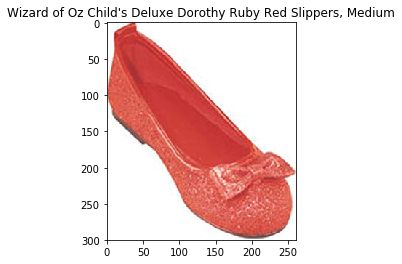

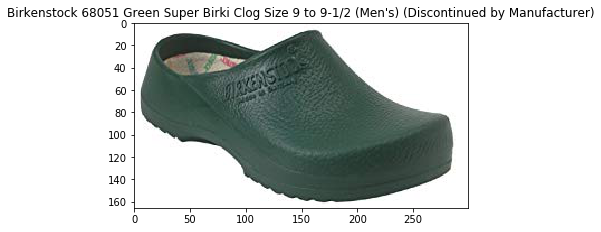

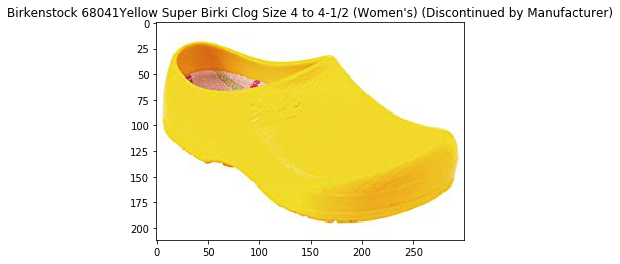

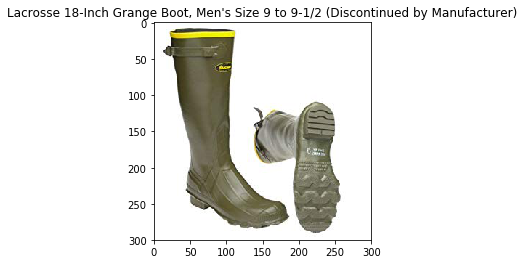

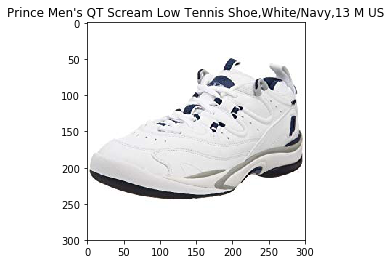

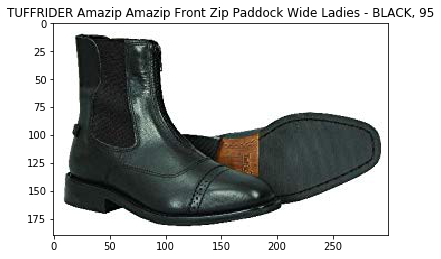

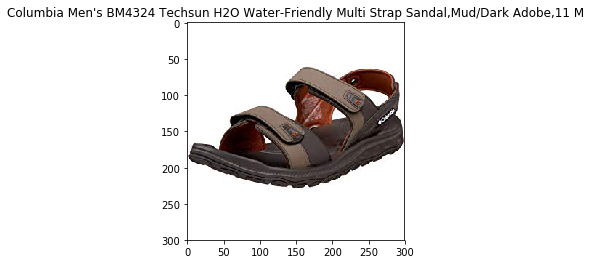

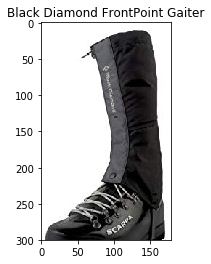

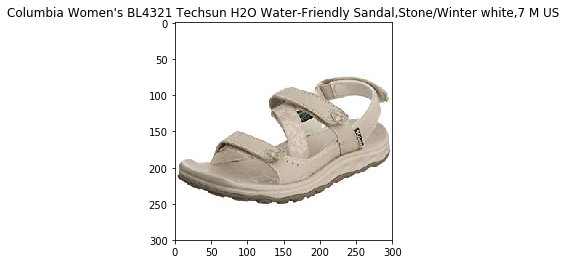

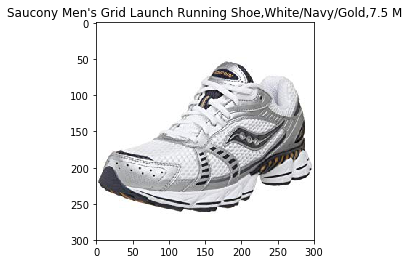

In [65]:
for title, url in zip(titles, urls):
    img = Image.open(urlopen(url))
    plt.title(title)
    plt.imshow(img)
    plt.show()

In [66]:
shoes.shape

(5232, 5)

In [102]:
shoes_corpora = shoes.title

In [103]:
text = shoes_corpora.sum()

In [105]:
words = text.split()

In [107]:
text_df = pd.DataFrame({"word": words})

In [112]:
text_df.word = text_df.word.apply(lambda x: str(x).rstrip())

In [117]:
text_df.word.unique().shape

(10350,)

In [122]:
text_df.word.value_counts()

Men's                         1783
Women's                       1750
-                              742
Running                        584
M                              416
Shoes                          330
Size                           326
Balance                        280
Trail                          269
MColumbia                      239
Shoe                           234
Hiking                         222
Bowling                        203
Black                          192
Boot                           190
Golf                           160
Bike                           142
Cycling                        142
Boots                          141
Walking                        140
II                             129
Mid                            125
2                              124
EU                             122
Womens                         114
Mountain                       112
Road                           112
MSaucony                       111
with                

In [92]:
shirts = udf[udf.unique_cat == 'Active Shirts & Tees']

In [93]:
shirts.head()

,title,description,categories,imUrl,unique_cat,catsizes
517,"Under Armour Men's Full Tee ( sz. XXXL, White )",The ultimate tee for those who love the cotton...,"[[Clothing, Shoes & Jewelry, Men, Clothing, Ac...",http://ecx.images-amazon.com/images/I/417VX3CQ...,Active Shirts & Tees,1
534,Under Armour Men's LooseGear Long-Sleeve Tee (...,"The most comfortable ""regular"" t-shirt you hav...","[[Clothing, Shoes & Jewelry, Men, Clothing, Ac...",http://ecx.images-amazon.com/images/I/41DFA4KY...,Active Shirts & Tees,1
543,Under Armour Men's LooseGear Sleeveless Tee ( ...,The most comfortable regular t-shirt you've ev...,"[[Clothing, Shoes & Jewelry, Men, Clothing, Ac...",http://ecx.images-amazon.com/images/I/31DK29MW...,Active Shirts & Tees,1
588,Easton Men's Eastech Performance Mock Tee ( sz...,"65% polyester/35% cotton with ribbed cuffs, fu...","[[Clothing, Shoes & Jewelry, Men, Clothing, Ac...",http://ecx.images-amazon.com/images/I/41R3KW6J...,Active Shirts & Tees,1
1983,ASICS Men's Solid Modified Singlet,Shoot the leg or reverse your opponent in styl...,"[[Clothing, Shoes & Jewelry, Men, Clothing, Ac...",http://ecx.images-amazon.com/images/I/31-4FJL-...,Active Shirts & Tees,1


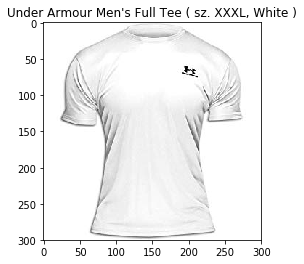

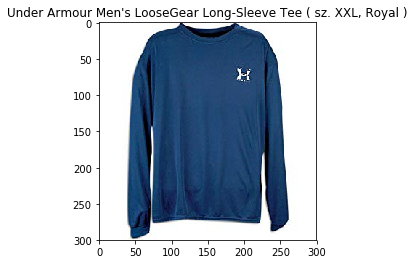

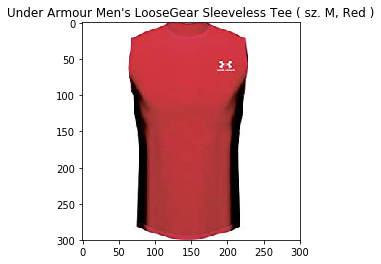

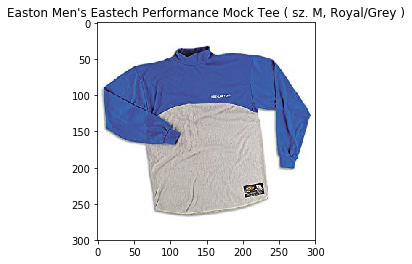

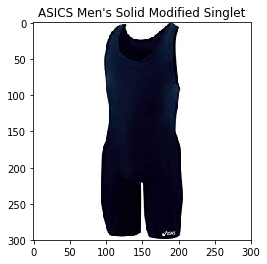

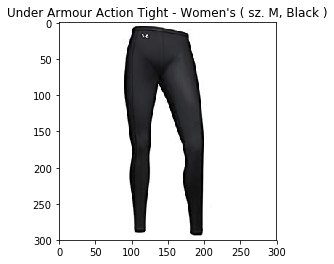

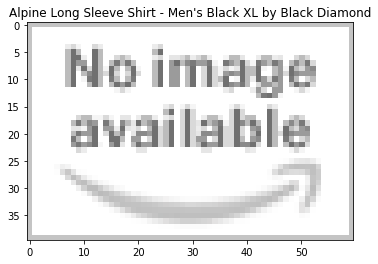

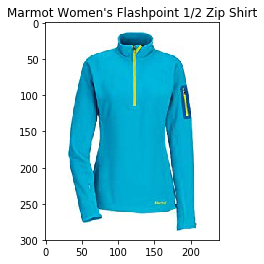

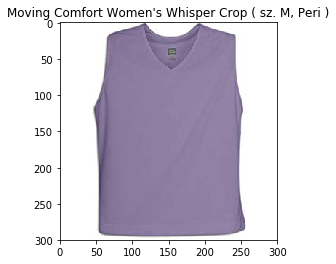

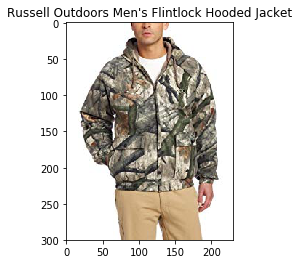

In [94]:
urls = shirts.imUrl.iloc[:10].values
titles = shirts.title.iloc[:10].values
for title, url in zip(titles, urls):
    img = Image.open(urlopen(url))
    plt.title(title)
    plt.imshow(img)
    plt.show()